<a href="https://colab.research.google.com/github/toussyn/TellCo_analysis/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [287]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [288]:
import numpy as np
import pandas as pd
import math
import sys, os
sys.path.append(os.path.abspath(os.path.join('../scripts/')))
#from dataframe_cleaner import *

df = pd.read_csv("/content/Week1_challenge_data_source(CSV).csv")
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Column names count

In [289]:
#list of column names

df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [290]:
#how many are the columns
print("There are " + str(len(df.columns)) + " columns in the dataset")

There are 55 columns in the dataset


In [291]:
#what are the data types of the columns
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                      int64
End                                          object
End ms                                        int64
Dur. (ms)                                     int64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                       int64
Avg Bearer TP UL (kbps)                       int64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

To better understand the data, let's see the description of the columns.

In [292]:
# read the column description
df_column_description = pd.read_excel("My Drive/10X/Field Descriptions.xlsx")
df_column_description

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


In [293]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 36786 rows and 55 columns


In [294]:
#checking the number of rows and columns
df.shape

(36786, 55)

In [295]:
# comparing the original dataset columns with its description rows
df_column_description.shape

(56, 2)

Something is wrong, the column description dataset has one column that is not present in the original dataset.
Let's take a side by side look of both of the datasets columns

In [296]:
concat_df = pd.concat([ pd.Series(df.columns.tolist()), df_column_description['Fields']], axis=1)
concat_df.rename(columns={0: 'original', 'Fields': 'description file'}, inplace=True)
concat_df

,original,description file
0,Bearer Id,bearer id
1,Start,Dur. (ms)
2,Start ms,Start
3,End,Start ms
4,End ms,End
5,Dur. (ms),End ms
6,IMSI,Dur. (s)
7,MSISDN/Number,IMSI
8,IMEI,MSISDN/Number
9,Last Location Name,IMEI


There is no column named "Dur. (s)" in the original dataset but it is present in the Fields Description file. Furthermore, the two columns "Dur. (ms)" and "Dur. (ms).1"  has the same description, "Total Duration of the xDR (in ms)". Does that mean there is no column in our dataset that gives the total duration in seconds? are the two columns with the same description really have the same data? Let's put the columns side by side.

In [297]:
# checking the values of Dur.(s) and Dur.(ms))
df[['Dur. (ms)', 'Dur. (ms).1']]

,Dur. (ms),Dur. (ms).1
0,1823652,1823652892
1,1365104,1365104371
2,1361762,1361762651
3,1321509,1321509685
4,1089009,1089009389
...,...,...
36781,112033,112033734
36782,85914,85914968
36783,86399,86399987
36784,86558,86558709


Dur. (ms) values is exactly the seconds equivalent of Dur. (ms).1, thus renaming the Dur. (ms) to reflect this is the next step.

In [298]:
# rename the column Dur. (ms)
df.rename(columns={'Dur. (ms)': 'Dur (s)', 'Dur. (ms).1': 'Dur (ms)'}, inplace=True)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## Handling Missing Values

In [299]:
# no of all missing values present in the dataset
print(f"There are {df.isnull().sum().sum()} missing values in the dataset")

There are 228605 missing values in the dataset


In [300]:
#checking the columns with missing values
df.isna().sum()

Bearer Id                                     476
Start                                           0
Start ms                                        0
End                                             0
End ms                                          0
Dur (s)                                         0
IMSI                                          231
MSISDN/Number                                 426
IMEI                                          231
Last Location Name                            578
Avg RTT DL (ms)                              4488
Avg RTT UL (ms)                              4478
Avg Bearer TP DL (kbps)                         0
Avg Bearer TP UL (kbps)                         0
TCP DL Retrans. Vol (Bytes)                 18574
TCP UL Retrans. Vol (Bytes)                 21427
DL TP < 50 Kbps (%)                           271
50 Kbps < DL TP < 250 Kbps (%)                271
250 Kbps < DL TP < 1 Mbps (%)                 271
DL TP > 1 Mbps (%)                            271


Get the percentage of missing values in the dataset

In [301]:
# what is the percentage of missing values in the dataset?
def percent_missing(datf):

    # Calculate total number of cells in dataframe
    total_cells = np.product(datf.shape)

    # Count number of missing values per column
    total_missing = datf.isnull().sum().sum()

    # Calculate percentage of missing values
    print("The Diabetes dataset contains", round(((total_missing/total_cells) * 100), 2), "%", "missing values.")
percent_missing(df)

The Diabetes dataset contains 11.3 % missing values.


Let's check the percentage of missing values of each column. Unless the column is of importance to future analysis and/or modeling, columns with more than 50% missing values will be dropped

In [302]:
def percent_missing_values(datf):
        #Get Missing value percentage of columns
        percent_missing = datf.isnull().sum() * 100 / len(df)
        missing_value = pd.DataFrame({'column_name': datf.columns,
                                         'percent_missing': percent_missing})

        missing_value.sort_values('percent_missing', inplace=True)
        
        return missing_value

df_missing = percent_missing_values(df)
df_missing

,column_name,percent_missing
Activity Duration UL (ms),Activity Duration UL (ms),0.000000
Dur (ms),Dur (ms),0.000000
Social Media DL (Bytes),Social Media DL (Bytes),0.000000
Social Media UL (Bytes),Social Media UL (Bytes),0.000000
Google DL (Bytes),Google DL (Bytes),0.000000
Google UL (Bytes),Google UL (Bytes),0.000000
Email DL (Bytes),Email DL (Bytes),0.000000
Avg Bearer TP UL (kbps),Avg Bearer TP UL (kbps),0.000000
Avg Bearer TP DL (kbps),Avg Bearer TP DL (kbps),0.000000
Dur (s),Dur (s),0.000000


In [303]:
cols_to_remove = df_missing[df_missing['percent_missing'] >= 50].index.tolist()
cols_to_remove

['TCP DL Retrans. Vol (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL']

We'll be removing columns that has something to do with TCP, as they are important for future analysis

In [304]:
# remove TCP columns
tcp = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']
cols_to_remove.remove('TCP DL Retrans. Vol (Bytes)')
cols_to_remove.remove('TCP UL Retrans. Vol (Bytes)')
cols_to_remove

['Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL']

In [305]:
df = df.drop(cols_to_remove, axis=1)

In [306]:
# checking skewness before filling na
df['Avg RTT DL (ms)'].skew(skipna = True)

50.89918982930336

In [307]:
df['Avg RTT UL (ms)'].skew(skipna = True)

40.097449255654574

In [308]:
# forward fill or backward fill is best for skewed columns
for col in ['Avg RTT UL (ms)', 'Avg RTT DL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']:
    df[col] = df[col].fillna(method='ffill')

In [309]:
df.dropna(inplace=True)
df.shape

(19497, 49)

In [310]:
df.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur (s)                           0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
TCP DL Retrans. Vol (Bytes)       0
TCP UL Retrans. Vol (Bytes)       0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
HTTP DL (Bytes)                   0
HTTP UL (Bytes)                   0
Activity Duration DL (ms)         0
Activity Duration UL (ms)   

In [311]:

df.drop(['Start ms', 'End ms', 'Dur (ms)'], axis=1, inplace=True)
df.shape

(19497, 46)

In [312]:
df.dtypes

Bearer Id                         float64
Start                              object
End                                object
Dur (s)                             int64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)             int64
Avg Bearer TP UL (kbps)             int64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              float64
HTTP DL (Bytes)                   float64
HTTP UL (Bytes)                   

In [313]:
df.drop_duplicates(inplace=True)

In [314]:
df.shape

(19497, 46)

In [317]:
df.dtypes

Bearer Id                         float64
Start                              object
End                                object
Dur (s)                             int64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)             int64
Avg Bearer TP UL (kbps)             int64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              float64
HTTP DL (Bytes)                   float64
HTTP UL (Bytes)                   

In [318]:
 def to_string(datf, col):
  datf[col] = datf[col].astype("string")
  return datf

to_string(df, 'Last Location Name')
to_string(df, 'Handset Type')
to_string(df, 'Handset Manufacturer')

,Bearer Id,Start,End,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
9,1.304243e+19,4/15/2019 0:32,4/25/2019 0:40,864482,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,97.0,7.0,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0
11,1.311448e+19,4/15/2019 11:33,4/25/2019 18:44,889834,2.082019e+14,3.366447e+10,8.600910e+13,T21335C,217.0,4.0,...,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0
14,1.304243e+19,4/16/2019 0:35,4/25/2019 0:40,777887,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,79.0,4.0,...,22283256.0,3025236.0,14599101.0,11634512.0,251467133.0,3629272.0,40078751.0,10359946.0,32480400.0,298662697.0
15,7.277826e+18,4/16/2019 8:56,4/25/2019 9:44,780471,2.082017e+14,3.375376e+10,3.557301e+13,T88606B,39.0,33.0,...,8715993.0,17842011.0,322630.0,5235123.0,26045464.0,16321224.0,137148601.0,15351908.0,58387271.0,42659750.0
20,1.304243e+19,4/17/2019 0:35,4/25/2019 4:52,706649,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,409.0,43.0,...,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36778,1.304243e+19,4/25/2019 1:58,4/26/2019 1:58,86399,2.082010e+14,3.369945e+10,8.637690e+13,L29699A,41.0,50.0,...,21274852.0,7075704.0,19997107.0,16554520.0,250935182.0,14322866.0,157015240.0,8311907.0,50605560.0,301665949.0
36779,1.304243e+19,4/25/2019 1:58,4/26/2019 1:58,86400,2.082017e+14,3.365028e+10,8.637690e+13,T83876C,71.0,33.0,...,22433027.0,19996200.0,4941038.0,896485.0,305172450.0,9480362.0,662955226.0,7723079.0,40031649.0,344739160.0
36780,1.304243e+19,4/25/2019 1:58,4/26/2019 1:58,86399,2.082017e+14,3.365994e+10,8.637690e+13,T21399B,46.0,13.0,...,17241985.0,9384523.0,20296927.0,19889136.0,75306115.0,2494053.0,156882244.0,5737605.0,40061274.0,119726097.0
36783,1.304243e+19,4/25/2019 1:58,4/26/2019 1:58,86399,2.082010e+14,3.369840e+10,8.637690e+13,D79671C,92.0,33.0,...,12078542.0,6606567.0,6960550.0,17568197.0,820818622.0,3709089.0,162615178.0,8132273.0,40246620.0,845690305.0


In [321]:
def to_datetime(datf, col):
        #Converts col's type to datetime 
        datf[col] = pd.to_datetime(datf[col], errors='coerce')
        return datf

to_datetime(df, 'Start')
to_datetime(df, 'End')

,Bearer Id,Start,End,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
9,1.304243e+19,2019-04-15 00:32:00,2019-04-25 00:40:00,864482,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,97.0,7.0,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0
11,1.311448e+19,2019-04-15 11:33:00,2019-04-25 18:44:00,889834,2.082019e+14,3.366447e+10,8.600910e+13,T21335C,217.0,4.0,...,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0
14,1.304243e+19,2019-04-16 00:35:00,2019-04-25 00:40:00,777887,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,79.0,4.0,...,22283256.0,3025236.0,14599101.0,11634512.0,251467133.0,3629272.0,40078751.0,10359946.0,32480400.0,298662697.0
15,7.277826e+18,2019-04-16 08:56:00,2019-04-25 09:44:00,780471,2.082017e+14,3.375376e+10,3.557301e+13,T88606B,39.0,33.0,...,8715993.0,17842011.0,322630.0,5235123.0,26045464.0,16321224.0,137148601.0,15351908.0,58387271.0,42659750.0
20,1.304243e+19,2019-04-17 00:35:00,2019-04-25 04:52:00,706649,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,409.0,43.0,...,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36778,1.304243e+19,2019-04-25 01:58:00,2019-04-26 01:58:00,86399,2.082010e+14,3.369945e+10,8.637690e+13,L29699A,41.0,50.0,...,21274852.0,7075704.0,19997107.0,16554520.0,250935182.0,14322866.0,157015240.0,8311907.0,50605560.0,301665949.0
36779,1.304243e+19,2019-04-25 01:58:00,2019-04-26 01:58:00,86400,2.082017e+14,3.365028e+10,8.637690e+13,T83876C,71.0,33.0,...,22433027.0,19996200.0,4941038.0,896485.0,305172450.0,9480362.0,662955226.0,7723079.0,40031649.0,344739160.0
36780,1.304243e+19,2019-04-25 01:58:00,2019-04-26 01:58:00,86399,2.082017e+14,3.365994e+10,8.637690e+13,T21399B,46.0,13.0,...,17241985.0,9384523.0,20296927.0,19889136.0,75306115.0,2494053.0,156882244.0,5737605.0,40061274.0,119726097.0
36783,1.304243e+19,2019-04-25 01:58:00,2019-04-26 01:58:00,86399,2.082010e+14,3.369840e+10,8.637690e+13,D79671C,92.0,33.0,...,12078542.0,6606567.0,6960550.0,17568197.0,820818622.0,3709089.0,162615178.0,8132273.0,40246620.0,845690305.0


In [322]:
def to_integer(datf, col):
        #Converts col_name's type to int
        datf[col] = datf[col].astype("int64")
        
        return datf

to_integer(df, 'Bearer Id')
to_integer(df, 'IMSI')
to_integer(df, 'MSISDN/Number')
to_integer(df, 'IMEI')

,Bearer Id,Start,End,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
9,-9223372036854775808,2019-04-15 00:32:00,2019-04-25 00:40:00,864482,208200314385130,33659219748,35573109931422,L20434C,97.0,7.0,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0
11,-9223372036854775808,2019-04-15 11:33:00,2019-04-25 18:44:00,889834,208201908306215,33664473872,86009102759374,T21335C,217.0,4.0,...,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0
14,-9223372036854775808,2019-04-16 00:35:00,2019-04-25 00:40:00,777887,208200314385130,33659219748,35573109931422,L20434C,79.0,4.0,...,22283256.0,3025236.0,14599101.0,11634512.0,251467133.0,3629272.0,40078751.0,10359946.0,32480400.0,298662697.0
15,7277825621540039680,2019-04-16 08:56:00,2019-04-25 09:44:00,780471,208201716888047,33753758738,35573009195619,T88606B,39.0,33.0,...,8715993.0,17842011.0,322630.0,5235123.0,26045464.0,16321224.0,137148601.0,15351908.0,58387271.0,42659750.0
20,-9223372036854775808,2019-04-17 00:35:00,2019-04-25 04:52:00,706649,208201008643031,33658752999,86540802106829,T29714B,409.0,43.0,...,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36778,-9223372036854775808,2019-04-25 01:58:00,2019-04-26 01:58:00,86399,208201009700104,33699445003,86376903228600,L29699A,41.0,50.0,...,21274852.0,7075704.0,19997107.0,16554520.0,250935182.0,14322866.0,157015240.0,8311907.0,50605560.0,301665949.0
36779,-9223372036854775808,2019-04-25 01:58:00,2019-04-26 01:58:00,86400,208201715264223,33650275304,86376903243442,T83876C,71.0,33.0,...,22433027.0,19996200.0,4941038.0,896485.0,305172450.0,9480362.0,662955226.0,7723079.0,40031649.0,344739160.0
36780,-9223372036854775808,2019-04-25 01:58:00,2019-04-26 01:58:00,86399,208201716755028,33659935824,86376903287475,T21399B,46.0,13.0,...,17241985.0,9384523.0,20296927.0,19889136.0,75306115.0,2494053.0,156882244.0,5737605.0,40061274.0,119726097.0
36783,-9223372036854775808,2019-04-25 01:58:00,2019-04-26 01:58:00,86399,208201008707304,33698400796,86376903217501,D79671C,92.0,33.0,...,12078542.0,6606567.0,6960550.0,17568197.0,820818622.0,3709089.0,162615178.0,8132273.0,40246620.0,845690305.0


In [324]:
df.dtypes

Bearer Id                                  int64
Start                             datetime64[ns]
End                               datetime64[ns]
Dur (s)                                    int64
IMSI                                       int64
MSISDN/Number                              int64
IMEI                                       int64
Last Location Name                        string
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                    int64
Avg Bearer TP UL (kbps)                    int64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%)                      float64
10 Kbps < UL TP < 50 Kbps (%)            float64
50 Kbps < UL TP < 30

In [325]:
df['Social Media Data Volume (Bytes)'] = df['Social Media UL (Bytes)'] + df['Social Media DL (Bytes)']
df['Total Data Volume (Bytes)'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
df['Google Data Volume (Bytes)'] = df['Google UL (Bytes)'] + df['Google DL (Bytes)']
df['Email Data Volume (Bytes)'] = df['Email UL (Bytes)'] + df['Email DL (Bytes)']
df['Other Data Volume (Bytes)'] = df['Other UL (Bytes)'] + df['Other DL (Bytes)']
df['Youtube Data Volume (Bytes)'] = df['Youtube UL (Bytes)'] + df['Youtube DL (Bytes)']
df['Netflix Data Volume (Bytes)'] = df['Netflix UL (Bytes)'] + df['Netflix DL (Bytes)']
df['Gaming Data Volume (Bytes)'] = df['Gaming UL (Bytes)'] + df['Gaming DL (Bytes)']

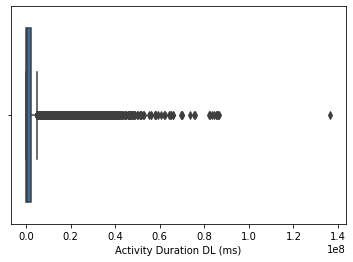

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['Activity Duration DL (ms)'])
plt.show()

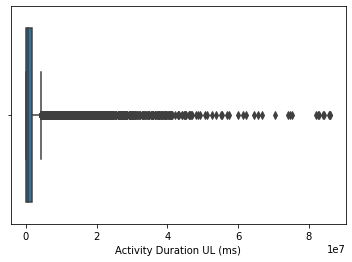

In [328]:
sns.boxplot(x=df['Activity Duration UL (ms)'])
plt.show()

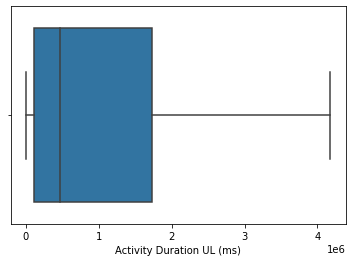

In [331]:
 def fix_outlier(datf, col):
  Q1 = datf[col].quantile(0.25)
  Q3 = datf[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  datf[col] = datf[col].clip(lower, upper)
  return datf

fix_outlier(df, 'Activity Duration UL (ms)')
fix_outlier(df, 'Activity Duration DL (ms)')
sns.boxplot(x=df['Activity Duration UL (ms)'])
plt.show()

In [334]:
df.to_csv("My Drive/10X/clean_df.csv")